In [1]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
import matplotlib

#matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [2]:
pkl_filename_master = "IP_OP_Hosp_cost_dem_inc_df_3_levels.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data = pickle.load(picklefile)

Check the dataframe length and column titles:

In [29]:
len(df_model_data)

238551

In [3]:
df_model_data.columns

Index([u'Average_Covered_Charges', u'Average_Medicare_Payments',
       u'Average_Total_Payments', u'DRG_Definition',
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',
       u'Provider_ID', u'Provider_Name', u'Provider_State',
       u'Provider_Street_Address',
       ...
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y',
       u'Percent_some_other_race', u'Percent_white', u'Rental_vacancy_rate',
       u'Homeowner_vacancy_rate', u'Average_family_size', u'Median_income_zip',
       u'Mean_income_zip', u'Zip_population'],
      dtype='object', length=126)

In [4]:
df_Model_1 = df_model_data.copy()

In [5]:
Column_list = [u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
              u'log_Average_Covered_Charges_median_3_bins',\
              u'Average_Covered_Charges_median_3_bins']


for column in Column_list:
    df_Model_1[column] = pd.to_numeric(df_Model_1[column])
    df_Model_1[column] = df_Model_1[column].astype(float)
    

In [6]:
#df_Model_1 = df_Model_1.drop(['Patient_payment','Patient_Payments_Stdev','Patient_Payments_Avg','Medicare_Payments_Std','Medicare_Payments_Avg','Total_Payments_Stdev','Total_Payments_Avg','Covered_Charges_Stdev','Covered_Charges_Avg','Provider_Name','Average_Covered_Charges','Provider_Street_Address','Provider_City','Hospital_Referral_Region_Description','Total_Discharges','Average_Total_Payments','Meets_criteria_for_meaningful_use_of_EHRs','Readmission_national_comparison','Patient_experience_national_comparison','Average_Medicare_Payments','Hospital_Name', 'County_Name'],1)

df_Model_1 = df_Model_1.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean', u'Average_Covered_Charges_median',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',u'Percent_female',\
        u'Percent_some_other_race',u'Mean_income_zip',\
                             u'County_Name',],1)
 


In [7]:
df_Model_1.columns

Index([u'DRG_Definition', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

First model will be without ratings d/t data loss of specific hospital types if we leave them in 

In [8]:
df_Model_1a = df_Model_1[df_Model_1.Service_type == '0']

In [9]:
df_Model_1a[[u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_3_bins']].apply(pd.Series.value_counts)
 

,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,Average_Covered_Charges_median_3_bins
False,NaN,NaN,NaN,2782.0,53373.0
True,NaN,NaN,NaN,198548.0,82321.0
0,202656.0,NaN,NaN,NaN,NaN
Acute Care Hospitals,NaN,201330.0,NaN,NaN,NaN
Government - Federal,NaN,NaN,444.0,NaN,NaN
Government - Hospital District or Authority,NaN,NaN,13844.0,NaN,NaN
Government - Local,NaN,NaN,6730.0,NaN,NaN
Government - State,NaN,NaN,4430.0,NaN,NaN
Physician,NaN,NaN,578.0,NaN,NaN
Proprietary,NaN,NaN,31296.0,NaN,NaN


In [10]:
df_Model_1a['Hospital_Ownership'] = df_Model_1a['Hospital_Ownership'].replace('Tribal','zTribal')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
df_Model_1a.dtypes

DRG_Definition                                object
Service_type                                  object
Hospital_Type                                 object
Hospital_Ownership                            object
Emergency_Services                            object
Average_Covered_Charges_median_3_bins        float64
log_Average_Covered_Charges_median_3_bins    float64
DRG_Definition_count                           int64
Median_Age                                   float64
Percent_Occupied_Housing_Units_x             float64
Percent_over_65                              float64
Percent_Native_American                      float64
Percent_asian                                float64
Percent Black or African American            float64
Percent_hispanic_or_latino                   float64
Percent_Male                                 float64
Percent_Occupied_Housing_Units_y             float64
Percent_white                                float64
Rental_vacancy_rate                          f

In [12]:
df_Model_1a['Average_Covered_Charges_median_3_bins'].groupby(df_Model_1a['Hospital_Ownership']).mean()

Hospital_Ownership
Government - Federal                           0.885135
Government - Hospital District or Authority    0.938024
Government - Local                             0.703418
Government - State                             1.151693
Physician                                      1.005190
Proprietary                                    1.512046
Voluntary non-profit - Church                  1.091837
Voluntary non-profit - Other                   0.984080
Voluntary non-profit - Private                 0.982432
zTribal                                        0.000000
Name: Average_Covered_Charges_median_3_bins, dtype: float64

In [13]:
df_Model_1a = df_Model_1a.drop(['Service_type',u'Hospital_Type', u'Emergency_Services',u'Percent_Occupied_Housing_Units_x'],1)

In [14]:
df_Model_1a.columns

Index([u'DRG_Definition', u'Hospital_Ownership',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_over_65', u'Percent_Native_American',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

KeyError: 'Level network must be same as name (None)'

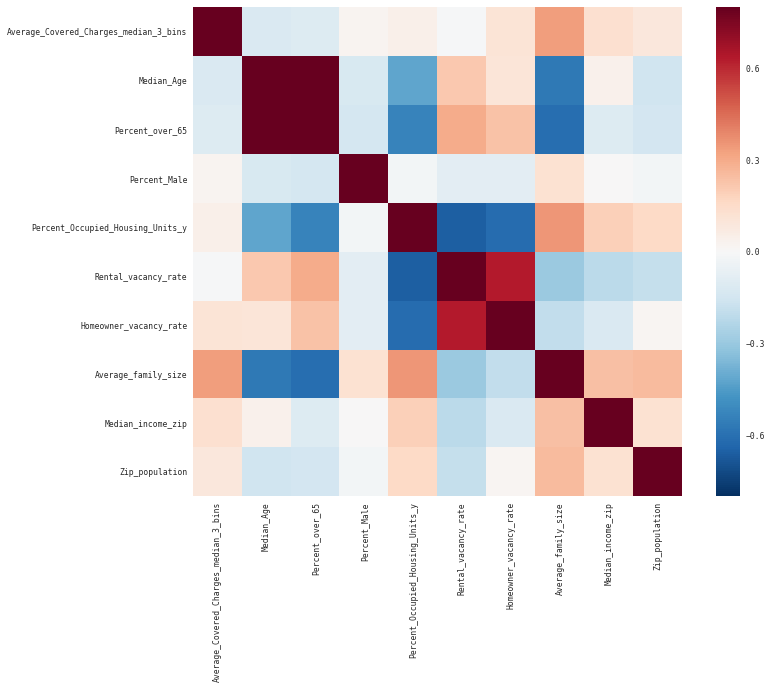

In [15]:
df_Model_1a_check = df_Model_1a.drop([u'log_Average_Covered_Charges_median_3_bins',\
       u'DRG_Definition_count', u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Percent_white'],1)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = df_Model_1a_check
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [16]:
df_Model_1a = df_Model_1a[df_Model_1a.DRG_Definition_count >= 1500]

In [17]:
df_Model_1a['DRG_Definition'].value_counts()

871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                      2837
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                        2837
292 - HEART FAILURE & SHOCK W CC                                              2774
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                  2743
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                               2731
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC      2702
603 - CELLULITIS W/O MCC                                                      2653
291 - HEART FAILURE & SHOCK W MCC                                             2646
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC                    2588
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                             2585
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC      2559
193 - SIMPLE PNEUMONIA & PLEURISY W MCC                                       2530
191 

In [30]:
df_Model_1a[df_Model_1a['DRG_Definition'] == '313 - CHEST PAIN']

,DRG_Definition,Hospital_Ownership,Average_Covered_Charges_median_3_bins,log_Average_Covered_Charges_median_3_bins,DRG_Definition_count,Median_Age,Percent_over_65,Percent_Native_American,Percent_asian,Percent Black or African American,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population
93718,313 - CHEST PAIN,Government - Hospital District or Authority,2.0,2.0,1719,38.5,14.5,0.4,0.8,25.8,2.9,48.0,90.4,70.0,9.8,2.4,2.96,38007.8711,35759.0
93719,313 - CHEST PAIN,Government - Hospital District or Authority,0.0,0.0,1719,38.2,14.9,0.8,0.5,1.6,12.1,49.3,88.8,87.6,8.6,2.5,3.05,33993.3607,15693.0
93720,313 - CHEST PAIN,Government - Hospital District or Authority,1.0,1.0,1719,40.4,16.8,0.4,0.7,10.0,2.2,47.9,88.3,86.4,9.3,2.1,2.89,NaN,NaN
93721,313 - CHEST PAIN,Voluntary non-profit - Private,1.0,1.0,1719,37.1,13.1,0.3,1.4,42.0,3.9,47.4,87.7,53.0,13.3,3.4,3.05,54491.2802,19484.0
93722,313 - CHEST PAIN,Voluntary non-profit - Private,1.0,1.0,1719,36.9,10.6,0.3,1.9,10.6,5.9,49.0,91.5,83.0,12.6,2.7,3.08,66251.0796,26225.0
93723,313 - CHEST PAIN,Government - Hospital District or Authority,1.0,1.0,1719,41.8,17.4,0.5,0.4,16.1,2.0,48.1,88.4,80.5,10.0,2.4,2.90,37147.4202,9042.0
93724,313 - CHEST PAIN,Government - Hospital District or Authority,0.0,0.0,1719,34.9,12.0,0.3,2.1,54.7,3.6,47.6,88.5,39.5,13.1,2.8,3.06,43827.2985,43790.0
93725,313 - CHEST PAIN,Voluntary non-profit - Private,0.0,0.0,1719,34.9,12.0,0.3,2.1,54.7,3.6,47.6,88.5,39.5,13.1,2.8,3.06,59961.2762,15211.0
93726,313 - CHEST PAIN,Government - Hospital District or Authority,0.0,0.0,1719,29.5,9.1,0.3,2.6,22.7,3.3,49.3,89.2,71.3,10.9,3.8,3.03,37923.4856,22214.0
93727,313 - CHEST PAIN,Government - State,1.0,1.0,1719,37.1,13.1,0.3,1.4,42.0,3.9,47.4,87.7,53.0,13.3,3.4,3.05,12468.0137,1308.0


In [18]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [19]:
df_Model_1a.columns

Index([u'DRG_Definition', u'Hospital_Ownership',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_over_65', u'Percent_Native_American',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

In [20]:
X = df_Model_1a.drop([u'Average_Covered_Charges_median_3_bins',u'log_Average_Covered_Charges_median_3_bins',u'DRG_Definition_count'],1)

In [21]:
X.columns

Index([u'DRG_Definition', u'Hospital_Ownership', u'Median_Age',
       u'Percent_over_65', u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

In [22]:
y = df_Model_1a[u'Average_Covered_Charges_median_3_bins']

In [23]:
y.value_counts()

1.0    38161
2.0    30079
0.0    23230
Name: Average_Covered_Charges_median_3_bins, dtype: int64

In [24]:
X_coded = X.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
#from sklearn import svm, datasets
#uses a 3-fold CV by default if you do not define otherwise
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#clf = GridSearchCV(svr, parameters)

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [3,5,10,13,16],
              "min_samples_split": [5,10,15],
              "min_samples_leaf": [5,10,15],
              "bootstrap": [True],
              "criterion": ["gini"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
#start = time()
grid_search.fit(X_coded, y)

report(grid_search.cv_results_)

# clf.fit()
# ...                             
# GridSearchCV(cv=None, error_score=...,
#        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
#                      decision_function_shape=None, degree=..., gamma=...,
#                      kernel='rbf', max_iter=-1, probability=False,
#                      random_state=None, shrinking=True, tol=...,
#                      verbose=False),
#        fit_params={}, iid=..., n_jobs=1,
#        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
#        scoring=..., verbose=...)
# sorted(clf.cv_results_.keys())
# ...                             
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'mean_train_score', 'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split0_train_score', 'split1_test_score', 'split1_train_score',...
#  'split2_test_score', 'split2_train_score',...
#  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 16),
              "min_samples_split": sp_randint(2, 16),
              "min_samples_leaf": sp_randint(2, 16),
              "bootstrap": [True],
              "criterion": ["gini"]}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

#start = time()
random_search.fit(X_coded, y)
#print("RandomizedSearchCV took %.2f seconds for %d candidates"
#      " parameter settings." % ((time() - start), n_iter_search))
#report(random_search.cv_results_)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13700f1d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13700f150>, 'criterion': ['gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12e7c36d0>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [44]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [45]:
random_search.best_score_

0.8211974721152151

In [46]:
print(random_search.best_estimator_,random_search.best_score_, random_search.best_params_ , random_search.best_index_,random_search.n_splits_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.821197472115 {'bootstrap': True, 'min_samples_leaf': 15, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 13, 'max_depth': None} 28 3


## Check gridsearch parameters in randomforest classifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.3)

In [48]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score

y_obs = y_test
accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 

for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 13,\
                                         min_samples_leaf= 15, min_samples_split = 3)]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)




RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

        0.0       0.83      0.79      0.81      6029
        1.0       0.78      0.81      0.79      9806
        2.0       0.88      0.87      0.87      7996

avg / total       0.82      0.82      0.82     23831

   accuracy score             0.8237 
   precision score            0.8237 
   recall score               0.8237 
   f1 score                   0.8237 
feature_importance =  [ 0.02603856  0.07664198  0.05146967  0.04251118  0.02567756  0.08058659
  0.03856867  0.18050233  0.03236861  0.04037644  0.03741733  0.04557666
  0.05250381  0.08287144  0.09302026  0.09386891]
max_tree_depth =  [25, 23, 25, 25, 26, 22, 26, 26, 22, 24]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8237

Precision
  RandomForestClassifier         0.8237

Recall
  RandomForestClassifier         0.8237

F1


In [49]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.025677560114476368),
 ('DRG_Definition', 0.026038560488675776),
 ('Percent_Male', 0.03236861250696349),
 ('Percent_white', 0.037417328427203175),
 ('Percent Black or African American', 0.038568673401678258),
 ('Percent_Occupied_Housing_Units_y', 0.04037643861507953),
 ('Percent_over_65', 0.042511180671581446),
 ('Rental_vacancy_rate', 0.045576661984370895),
 ('Median_Age', 0.051469671635848799),
 ('Homeowner_vacancy_rate', 0.052503809339990326),
 ('Hospital_Ownership', 0.076641976342368065),
 ('Percent_asian', 0.080586589111021636),
 ('Average_family_size', 0.082871438500037781),
 ('Median_income_zip', 0.093020256055758907),
 ('Zip_population', 0.093868909542710294),
 ('Percent_hispanic_or_latino', 0.18050233326223525)]

In [50]:
y_true = y_test
y_pred = algorithm.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=[float(0), float(1), float(2)])

array([[5447, 1431,   34],
       [1189, 9161, 1025],
       [  30, 1267, 7857]])

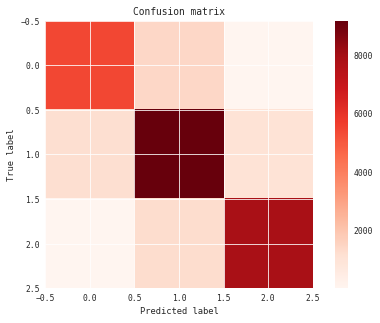

In [138]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm=confusion_matrix(y_true, y_pred, labels=[float(0), float(1), float(2)])
    
plt.figure()
plot_confusion_matrix(cm)

In [55]:
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

NameError: name 'y_score' is not defined

## Drop NAs

In [34]:
df_Model1b = df_Model_1a.dropna()

In [35]:
len(df_Model1b)

79434

In [37]:
len(df_Model_1a)

91470

In [38]:
X = df_Model1b.drop([u'Average_Covered_Charges_median_3_bins',u'log_Average_Covered_Charges_median_3_bins',u'DRG_Definition_count'],1)

In [42]:
X.shape

(79434, 16)

In [60]:
X.dtypes

DRG_Definition                        object
Hospital_Ownership                    object
Median_Age                           float64
Percent_over_65                      float64
Percent_Native_American              float64
Percent_asian                        float64
Percent Black or African American    float64
Percent_hispanic_or_latino           float64
Percent_Male                         float64
Percent_Occupied_Housing_Units_y     float64
Percent_white                        float64
Rental_vacancy_rate                  float64
Homeowner_vacancy_rate               float64
Average_family_size                  float64
Median_income_zip                    float64
Zip_population                       float64
dtype: object

In [63]:
X.groupby(u'DRG_Definition').max()

,Hospital_Ownership,Median_Age,Percent_over_65,Percent_Native_American,Percent_asian,Percent Black or African American,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population
DRG_Definition,,,,,,,,,,,,,,,
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,Voluntary non-profit - Private,62.7,43.4,43.4,43.9,75.5,95.7,56.4,96.0,98.8,37.3,6.8,4.05,171584.8312,113916.0
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC OR TPA IN 24 HRS,Voluntary non-profit - Private,62.7,43.4,43.4,43.9,75.5,95.7,60.8,96.0,98.1,37.3,6.8,4.05,171584.8312,113916.0
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,Voluntary non-profit - Private,62.7,43.4,43.4,43.9,72.2,95.7,59.0,96.0,98.4,37.3,6.8,4.05,171584.8312,113916.0
069 - TRANSIENT ISCHEMIA,Voluntary non-profit - Private,62.7,43.4,43.3,43.9,72.2,95.7,56.4,96.0,98.3,37.3,6.8,4.05,171584.8312,113916.0
177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC,Voluntary non-profit - Private,62.7,43.4,36.6,43.9,71.3,95.7,60.8,96.0,98.8,29.7,6.6,4.05,171584.8312,113916.0
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,Voluntary non-profit - Private,62.7,43.4,75.5,43.9,75.5,95.7,60.8,96.0,98.8,37.3,6.8,4.05,171584.8312,113916.0
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,Voluntary non-profit - Private,62.7,43.4,43.4,43.9,75.5,95.7,60.8,96.0,98.8,37.3,6.8,4.05,171584.8312,113916.0
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,zTribal,62.7,43.4,75.5,43.9,75.5,95.7,60.8,96.0,98.8,37.3,6.8,4.05,171584.8312,113916.0
192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC,zTribal,62.7,43.4,43.3,43.9,81.5,95.7,61.3,96.0,98.8,37.3,6.8,4.05,171584.8312,113916.0


In [39]:
y = df_Model1b[u'Average_Covered_Charges_median_3_bins']

In [61]:
y.dtypes

dtype('float64')

In [51]:
y.value_counts()

1.0    32329
2.0    27065
0.0    20040
Name: Average_Covered_Charges_median_3_bins, dtype: int64

In [40]:
X_coded = X.apply(preprocessing.LabelEncoder().fit_transform)

In [64]:
X_coded.shape

(79434, 16)

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 16),
              "min_samples_split": sp_randint(2, 16),
              "min_samples_leaf": sp_randint(2, 16),
              "bootstrap": [True],
              "criterion": ["gini"]}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

#start = time()
random_search.fit(X_coded, y)
#print("RandomizedSearchCV took %.2f seconds for %d candidates"
#      " parameter settings." % ((time() - start), n_iter_search))
#report(random_search.cv_results_)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12e7c3d50>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12eaad1d0>, 'criterion': ['gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12eaad050>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [52]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [53]:
random_search.best_score_

0.8211974721152151

In [54]:
print(random_search.best_estimator_,random_search.best_score_, random_search.best_params_ , random_search.best_index_,random_search.n_splits_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.821197472115 {'bootstrap': True, 'min_samples_leaf': 15, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 13, 'max_depth': None} 28 3


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.3)

In [56]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score

y_obs = y_test
accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 

for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 13,\
                                         min_samples_leaf= 15, min_samples_split = 3)]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

        0.0       0.84      0.78      0.81      6043
        1.0       0.77      0.81      0.79      9736
        2.0       0.87      0.87      0.87      8052

avg / total       0.82      0.82      0.82     23831

   accuracy score             0.8198 
   precision score            0.8198 
   recall score               0.8198 
   f1 score                   0.8198 
feature_importance =  [ 0.02546885  0.07084425  0.04994387  0.0393913   0.02565905  0.08556322
  0.03785943  0.20345336  0.03696231  0.04219538  0.03918942  0.04359583
  0.04708222  0.06380409  0.09201637  0.09697104]
max_tree_depth =  [22, 27, 24, 23, 22, 23, 22, 23, 25, 25]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8198

Precision
  RandomForestClassifier         0.8198

Recall
  RandomForestClassifier         0.8198

F1


In [ ]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

In [65]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ImportError: No module named xgboost

In [66]:

y_obs = y_test
accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 

for algorithm in [GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    #alg_label = str(algorithm)
    #alg_label = alg_label[:alg_label.index('(')]
    #importances = algorithm.feature_importances_
    # create dictionary of stats
    #accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    #precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    #recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    #f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    #feature_importance = importances
    #estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]
algorithm.score(X_test, y_test)  

0.65515505014476938

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
>>> clf.score(X_test, y_test)                 

In [61]:
from sklearn import metrics

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

ValueError: Data is not binary and pos_label is not specified

## Try GridSearchCV:

In [103]:
y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

In [104]:
X_coded = X.apply(preprocessing.LabelEncoder().fit_transform)

In [108]:
#from sklearn import svm, datasets
#uses a 3-fold CV by default if you do not define otherwise
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#clf = GridSearchCV(svr, parameters)

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [3,5,10,13,16],
              "min_samples_split": [3, 5, 10],
              "min_samples_leaf": [ 3, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
#start = time()
grid_search.fit(X_coded, y)

report(grid_search.cv_results_)

# clf.fit()
# ...                             
# GridSearchCV(cv=None, error_score=...,
#        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
#                      decision_function_shape=None, degree=..., gamma=...,
#                      kernel='rbf', max_iter=-1, probability=False,
#                      random_state=None, shrinking=True, tol=...,
#                      verbose=False),
#        fit_params={}, iid=..., n_jobs=1,
#        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
#        scoring=..., verbose=...)
# sorted(clf.cv_results_.keys())
# ...                             
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'mean_train_score', 'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split0_train_score', 'split1_test_score', 'split1_train_score',...
#  'split2_test_score', 'split2_train_score',...
#  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

NameError: name 'report' is not defined

In [109]:
grid_search.cv_results_

{'mean_fit_time': array([  0.61455544,   0.49780329,   0.48549819,   0.45986724,
          0.45395939,   1.70716135,   0.51489067,   0.51450666,
          0.61680603,   0.6906027 ,   0.67915567,   0.61333275,
          0.72450407,   0.68143201,   0.57891226,   0.60956812,
          0.61246864,   0.65830294,   0.93721302,   0.86222537,
          1.05629333,   1.18146237,   0.87259467,   1.22991467,
          1.37275068,   1.13567734,   1.38668307,   1.78669691,
          2.26233498,   1.33464495,   1.13190309,   1.11038995,
          0.99854636,   1.03981026,   1.14127763,   0.99660691,
          1.30103064,   1.22271427,   1.16722735,   1.20500167,
          1.22337802,   1.23346329,   1.26823831,   1.2293303 ,
          1.26368332,   1.05452863,   1.03893129,   1.0563097 ,
          1.021161  ,   1.1491123 ,   1.0849967 ,   1.00108131,
          1.03269839,   1.11201938,   1.55850935,   1.89218656,
          1.96272127,   2.19331662,   1.91786075,   1.66217597,
          1.56444534,  

In [110]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
grid_search.best_score_

0.80302831529463214

In [112]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [114]:
for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 13,\
                                         min_samples_leaf= 10, min_samples_split = 10)]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.85      0.84      0.85      9780
          1       0.71      0.72      0.71      8635
          2       0.87      0.87      0.87      9026

avg / total       0.81      0.81      0.81     27441

   accuracy score             0.8127 
   precision score            0.8127 
   recall score               0.8127 
   f1 score                   0.8127 
feature_importance =  [ 0.04546597  0.08433372  0.04264243  0.03977599  0.0334963   0.02996351
  0.06058165  0.0343369   0.17579898  0.03296311  0.08140001  0.04576934
  0.03396756  0.04314959  0.10647143  0.1098835 ]
max_tree_depth =  [28, 25, 26, 27, 29, 26, 25, 29, 25, 26]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8127

Precision
  RandomForestClassifier         0.8127

Recall
  RandomForestClassifier         0.8127

F1
  RandomForestClassifier         0.8127


In [115]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.029963510053299124),
 ('Percent_Male', 0.032963111179264981),
 ('Percent_over_65', 0.033496300721510434),
 ('Homeowner_vacancy_rate', 0.033967564328302849),
 ('Percent Black or African American', 0.034336903183365658),
 ('Percent_Occupied_Housing_Units_x', 0.039775987048936236),
 ('Median_Age', 0.042642430746133844),
 ('Average_family_size', 0.043149590800956372),
 ('DRG_Definition', 0.045465970046231464),
 ('Rental_vacancy_rate', 0.045769342644743319),
 ('Percent_asian', 0.060581646405008363),
 ('Percent_white', 0.08140000621446028),
 ('Hospital_Ownership', 0.084333718462242219),
 ('Median_income_zip', 0.10647143388072267),
 ('Zip_population', 0.10988350156311384),
 ('Percent_hispanic_or_latino', 0.17579898272170838)]

16
16
('DRG_Definition', 'Percent_Native_American', 'Percent_Male', 'Percent Black or African American', 'Percent_over_65', 'Homeowner_vacancy_rate', 'Average_family_size', 'Median_Age', 'Percent_Occupied_Housing_Units_y', 'Percent_white', 'Rental_vacancy_rate', 'Percent_asian', 'Hospital_Ownership', 'Median_income_zip', 'Zip_population', 'Percent_hispanic_or_latino')


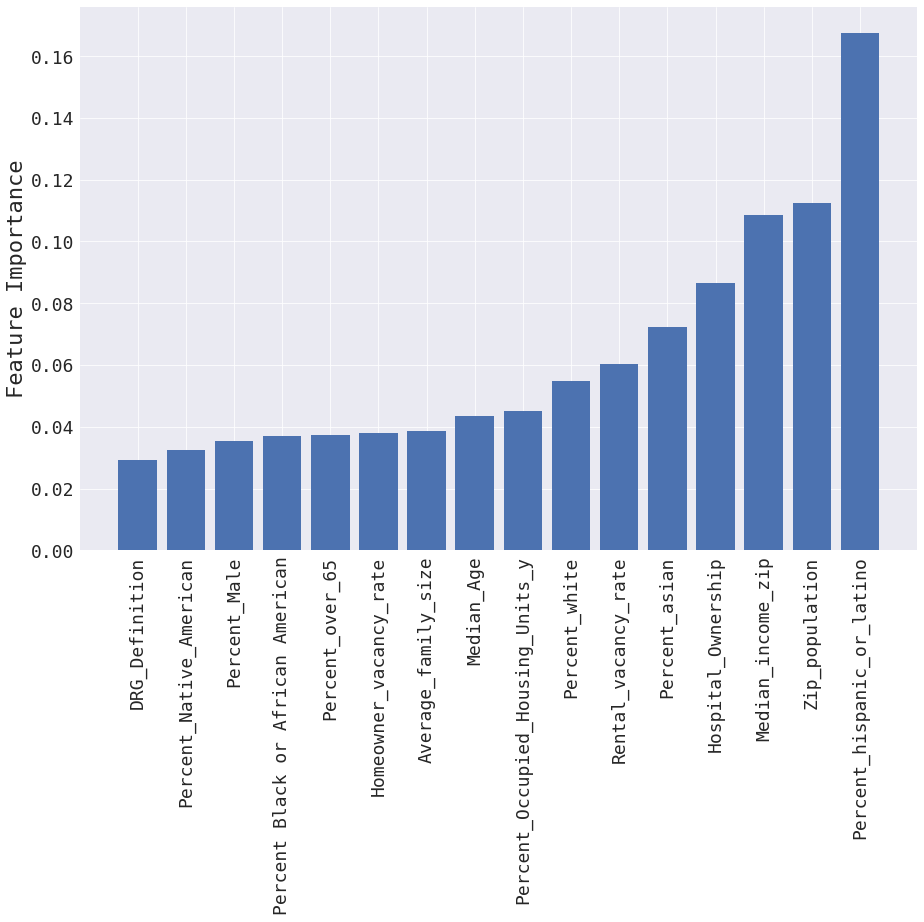

In [139]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

features = zip(*zipped)[0]
importance = zip(*zipped)[1]
x_pos = np.arange(len(zipped)) 

print(features)

plt.figure(figsize=(15,10))
plt.bar(x_pos, importance ,align='center')
plt.yticks(fontsize = 18) 
plt.xticks(x_pos, features, rotation = 90, fontsize = 18) 
plt.ylabel('Feature Importance', fontsize = 22)

plt.show()